In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/creditcardfraud/creditcard.csv


In [2]:
df = pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")
df.head(), df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

(   Time        V1        V2        V3        V4        V5        V6        V7  \
 0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
 1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
 2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
 3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
 4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   
 
          V8        V9  ...       V21       V22       V23       V24       V25  \
 0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
 1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
 2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
 3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
 4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   
 
         V26      

In [3]:
df = df.drop("Time", axis=1)
X = df.drop("Class", axis=1).to_numpy()
y = df["Class"].to_numpy()
X[:1], y[:1]

(array([[-1.35980713e+00, -7.27811733e-02,  2.53634674e+00,
          1.37815522e+00, -3.38320770e-01,  4.62387778e-01,
          2.39598554e-01,  9.86979013e-02,  3.63786970e-01,
          9.07941720e-02, -5.51599533e-01, -6.17800856e-01,
         -9.91389847e-01, -3.11169354e-01,  1.46817697e+00,
         -4.70400525e-01,  2.07971242e-01,  2.57905802e-02,
          4.03992960e-01,  2.51412098e-01, -1.83067779e-02,
          2.77837576e-01, -1.10473910e-01,  6.69280749e-02,
          1.28539358e-01, -1.89114844e-01,  1.33558377e-01,
         -2.10530535e-02,  1.49620000e+02]]),
 array([0]))

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [5]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(
    n_estimators=100,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)


In [6]:
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(rf_clf, X_train, y_train, cv=3)

In [7]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_train, y_pred)
recall = recall_score(y_train, y_pred)
f1 = f1_score(y_train, y_pred)
print("Precision:", precision)
print("Recall:", recall)
print("f1:", f1)

Precision: 0.9411764705882353
Recall: 0.7309644670050761
f1: 0.8228571428571428


In [8]:
import matplotlib.pyplot as plt
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
 plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
 plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
 plt.xlabel("Threshold")
 plt.legend(loc="center left")
 plt.ylim([0, 1])

In [9]:
y_scores = cross_val_predict(rf_clf, X_train, y_train, cv=3, method="predict_proba")
y_scores

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [10]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores[:, 1])
y_scores, y_scores.shape

(array([[1., 0.],
        [1., 0.],
        [1., 0.],
        ...,
        [1., 0.],
        [1., 0.],
        [1., 0.]]),
 (227845, 2))

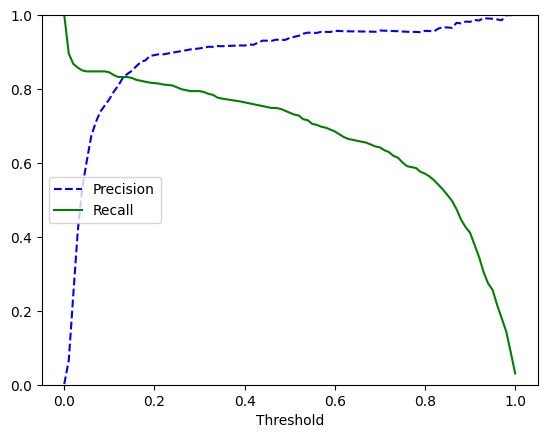

In [11]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

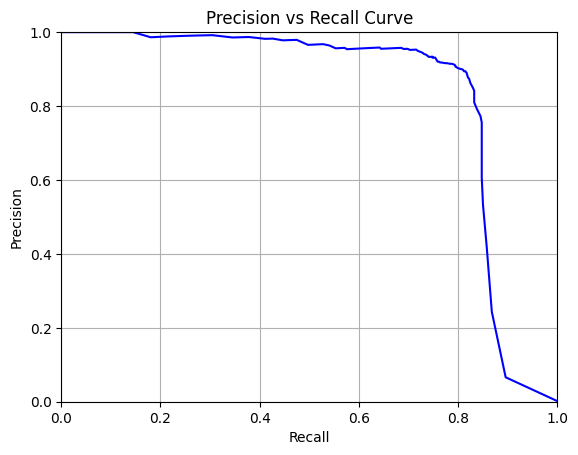

In [12]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision vs Recall Curve")
    plt.ylim([0, 1])
    plt.xlim([0, 1])
    plt.grid(True)
    plt.show()

# Call it
plot_precision_vs_recall(precisions, recalls)

In [13]:
target_recall = 0.90
idx = np.argmin(np.abs(recalls - target_recall))
best_threshold = thresholds[idx]
print("Threshold for ~90% recall:", best_threshold)

Threshold for ~90% recall: 0.01


In [14]:
from sklearn.metrics import recall_score

y_pred_90 = (y_scores[:,1] >= best_threshold)
recall_score(y_train, y_pred_90)

0.8959390862944162

In [15]:
rf_clf.fit(X_train, y_train)

y_scores_test = rf_clf.predict_proba(X_test)[:,1]
y_pred_test = (y_scores_test >= best_threshold).astype(int)

print("Recall:", recall_score(y_test, y_pred_test))
print("Precision:", precision_score(y_test, y_pred_test))
print("F1:", f1_score(y_test, y_pred_test))

Recall: 0.9183673469387755
Precision: 0.07003891050583658
F1: 0.13015184381778744
